# Single Layer Perceptron Implementation

## Importing Modules

In [1]:
# using for manipulating dataset
import numpy as np

# using for Creating dataset and visualization only
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Perceptron Class

In [2]:
class Perceptron:
    def __init__(self, features, epochs=1000, learning_rate=0.01):
        self.epochs = epochs
        self.features = features
        self.learning_rate = learning_rate
        self.weights = [0 for i in range(features+1)]
        
        print(f"Epochs\t\t: {epochs}\nFeatures\t: {features}\nLearning Rate\t: {learning_rate}")
        
    def predict(self, inputs):
        summation = self.weights[0]
        summation += sum([inputs[j]*self.weights[j+1] for j in range(self.features)])
        return 1 if summation>0 else 0

    def train(self, tinputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(tinputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
        
        print("Trained Weight:\n"+"\n".join(map(str,self.weights)))
        
    def DoPredict(self, testData):
        predicted = list()
        testLabel = list(map(int, testData[:,-1]))

        print("Labels\tPredicted")

        for i in range(len(testLabel)):
            predicted.append(self.predict(test[i,:-1]))
            print(f'{testLabel[i]}\t{predicted[-1]}')

        return testLabel, predicted

## Other Functions

In [3]:
def GenerateConfusionMatrix(testLabel, predicted):
    confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for i in range(len(predicted)):
        if testLabel[i] == 1 and predicted[i] == 1:
            confusion['TP']+=1
        elif testLabel[i] == 1 and predicted[i] == 0:
            confusion['FN']+=1
        elif testLabel[i] == 0 and predicted[i] == 1:
            confusion['FP']+=1
        else:
            confusion['TN']+=1
    return confusion

In [4]:
def ShowConfusionMatrix(testLabel, predicted):
    data = {'Actual Label': testLabel, 'Predicted Label': predicted}
    df = pd.DataFrame(data, columns=data.keys())
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)

In [5]:
def CalculateMetrics(confusion):
    accuracy = (confusion['TP']+confusion['TN'])/sum(confusion.values())
    error_rate = 1-accuracy
    precision = confusion['TP']/(confusion['TP']+confusion['FP'])
    recall = confusion['TP']/(confusion['TP']+confusion['FN'])
    f1_score = 2*precision*recall/(precision+recall)
    
    print(f"Accuracy \t: {round(accuracy,4)}\nError Rate \t: {round(error_rate,4)}\nPrecision \t: {round(precision,4)}\nRecall  \t: {round(recall,4)}\nF1 Score \t: {round(f1_score,4)}")

## Creating Random DataSet

In [6]:
# Creating RandomDataSet.csv
data = np.zeros((100,5), dtype=float)

np.random.seed(42)
data[:50,4] = 0
data[50:,4] = 1

for i in range(data.shape[1]-1):
    data[:50, i] = np.random.random((1,50))*10
    data[50:, i] = np.random.random((1,50))*50

df = pd.DataFrame(data, columns= ['Feature'+str(i) for i in range(1,5)]+['label'])
df.to_csv("RandomDataSet.csv", index=False)

## Single Layer Perceptron on RandomDataSet
### Reading RandomDataSet.csv

In [7]:
# reading the created RandomDataSet.csv
df = pd.read_csv('RandomDataSet.csv')
df.head()

,Feature1,Feature2,Feature3,Feature4,label
0,3.745401,0.314292,6.420316,0.516817,0.0
1,9.507143,6.364104,0.841400,5.313546,0.0
2,7.319939,3.143560,1.616287,5.406351,0.0
3,5.986585,5.085707,8.985542,6.374299,0.0
4,1.560186,9.075665,6.064291,7.260913,0.0


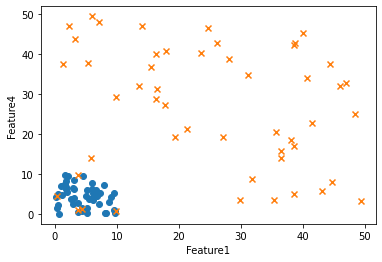

In [8]:
plt.scatter(df[ df['label']==0.0 ]['Feature1'], df[ df['label']==0.0 ]['Feature4'], marker='o', Label=0)
plt.scatter(df[ df['label']==1.0 ]['Feature1'], df[ df['label']==1.0 ]['Feature4'], marker='x', Label=1)

plt.xlabel('Feature1')
plt.ylabel('Feature4')

plt.show()

### Splitting DataSet into Train and Test Data

In [9]:
data = df.to_numpy()

# splitting dataset into test data and train data
test = np.vstack((data[:20], data[50:70]))
train = np.vstack((data[20:50], data[70:]))

features = train[:,:-1]
labels = train[:,-1]

### Perceptron Object, Training, Testing

In [10]:
p = Perceptron(features.shape[1], 1000, 0.01)

Epochs		: 1000
Features	: 4
Learning Rate	: 0.01


In [11]:
p.train(features, labels)

Trained Weight:
-3.5999999999999672
0.001509860651934588
0.17236102304757456
0.09197964050385866
0.13786353747539018


In [12]:
testLabel, predicted = p.DoPredict(test)

Labels	Predicted
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	0
1	1


### Confusion Metrix and Metrics

In [13]:
confusion = GenerateConfusionMatrix(testLabel, predicted)
print(confusion)

{'TP': 19, 'TN': 20, 'FP': 0, 'FN': 1}


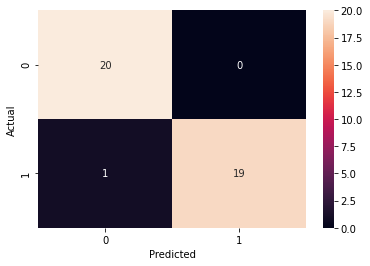

In [14]:
ShowConfusionMatrix(testLabel, predicted)

In [15]:
CalculateMetrics(confusion)

Accuracy 	: 0.975
Error Rate 	: 0.025
Precision 	: 1.0
Recall  	: 0.95
F1 Score 	: 0.9744


## Single Layer Perceptron on Sonar DataSet

### Reading Sonar DataSet

In [16]:
# using sonar dataset
df = pd.read_csv('sonar.all-data.csv')

df['R'] = df['R'].map({'R': 1, 'M': 0})
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


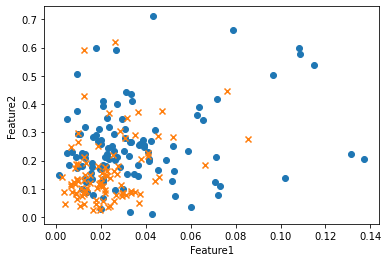

In [17]:
plt.scatter(df[ df['R']==0.0 ]['0.0200'], df[ df['R']==0.0 ]['0.2111'], marker='o', Label=0)
plt.scatter(df[ df['R']==1.0 ]['0.0200'], df[ df['R']==1.0 ]['0.2111'], marker='x', Label=1)

plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.show()

### Splitting DataSet into Train and Test Data

In [18]:
# converting dataframe into numpy array
data = df.to_numpy()

# splitting dataset into test data and train data
test = np.vstack((data[:20], data[180:]))
train = data[20:180]

features = train[:,:-1]
labels = train[:,-1]

### Perceptron Object, Training, Testing

In [19]:
p = Perceptron(features.shape[1])

Epochs		: 1000
Features	: 60
Learning Rate	: 0.01


In [20]:
p.train(features, labels)

Trained Weight:
0.3300000000000001
-0.1409009999999996
0.1954829999999921
0.15519700000000014
-0.6561879999999903
-0.9627480000000388
0.3441110000000052
0.3240489999999991
0.15706499999999726
-0.206727000000003
-0.010827000000001849
-0.13185899999999853
-0.32412000000000285
0.41733199999998605
-0.8022259999999505
0.07299900000000172
0.06266499999999857
0.14937900000000598
0.11844799999999832
-0.18151100000000858
-0.2102569999999991
0.25633800000001206
-0.3222120000000146
-0.00232200000000059
-0.2222549999999911
0.10190700000000127
0.3738469999999909
-0.5630820000000254
0.08135799999999882
0.2815980000000121
-0.14501000000000114
0.2763680000000034
0.0712749999999988
-0.448821999999981
0.05767300000000031
0.04515200000000688
0.3805740000000052
0.0007189999999975695
-0.45406699999999833
0.05441700000000214
0.0016019999999992863
0.2712950000000036
-0.07452600000000024
-0.15489200000000686
-0.21656400000000264
-0.21983300000000228
-0.17726999999999324
0.0009479999999961308
-0.32725600000000

In [21]:
testLabel, predicted = p.DoPredict(test)

Labels	Predicted
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	1
1	0
1	0
1	1
1	0
1	1
1	0
1	0
1	1
1	0
1	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	1
0	0
0	0


### Confusion Metrix and Metrics

In [22]:
confusion = GenerateConfusionMatrix(testLabel, predicted)
print(confusion)

{'TP': 4, 'TN': 26, 'FP': 1, 'FN': 16}


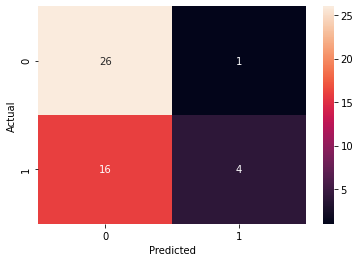

In [23]:
ShowConfusionMatrix(testLabel, predicted)

In [24]:
CalculateMetrics(confusion)

Accuracy 	: 0.6383
Error Rate 	: 0.3617
Precision 	: 0.8
Recall  	: 0.2
F1 Score 	: 0.32


### Extra : Reading same dataset without using pandas and Storing it as Numpy Array

In [25]:
import numpy as np

def read_csv(filename):
    datafile = open(filename, 'r')
    data=list()

    for i in datafile.readlines()[1:]:
        data.append((list(map(float,i.strip().split(',')))))

    return np.asarray(data)

data = read_csv("RandomDataSet.csv")
print(type(data))
print("First 5 rows:\n",data[:5])

<class 'numpy.ndarray'>
First 5 rows:
 [[3.74540119 0.31429186 6.42031646 0.51681721 0.        ]
 [9.50714306 6.36410411 0.84139965 5.31354632 0.        ]
 [7.31993942 3.14355981 1.61628714 5.40635122 0.        ]
 [5.98658484 5.08570691 8.98554189 6.37429901 0.        ]
 [1.5601864  9.07566474 6.0642906  7.26091334 0.        ]]
